# PCA for shape generation
<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">

This is the second mandatory exercise which means you will have to hand in this Jupyter Notebook with your implementation and notes. This exercise is split into multiple parts which have to be submitted together. The submission deadline is available on LearnIT, linked at the bottom of the assigment.


</div>

<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">


<article class="message">
    <div class="message-body">
        <strong>Overview of mandatory tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#get_pca">Task 1: Get principal compontents</a>
            </li>
            <li>
            <a href="#gen">Task 2: Base face</a>
            </li>
            <li>
            <a href="#c">Task 3: Generate faces</a>
            </li>
            <li>
            <a href="#interpolate">Task 4: Interpolation between two faces</a>
            </li>
            <li>
            <a href="#reflect">Task 5: Reflection</a>
            </li>
            <li>
            <a href="#Dimensionality_red">Task 6: Out of distribution generation</a>
            </li>
        </ul>
    </div>
</article>



</div>


**Important**
Please read and solve the in-class exercise about PCA **before starting on this assignment**. The transformations between data space and latent space are needed for this assigment. However, no questions and task from this assigment will be about the (in-class) exercise. Naturally, you are still welcome to ask about the exercise implementation at the dedicated times. 

In this mandatory exercise you will use PCA to generate face shapes. The goal is to investigate the relation between points in latent space and the data space. 


In [1]:
## Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy
from utils import *
import os
from glob import glob

## Data
The dataset used for the assigment consist of 120 landmarks (2D points) of faces (data space). A face consists of 73 (x,y)-coordinate pairs, i.e. 146 featues in total.
The following cell loads the data and uses the function `plot_many_faces`
 to  visualize 6 faces.


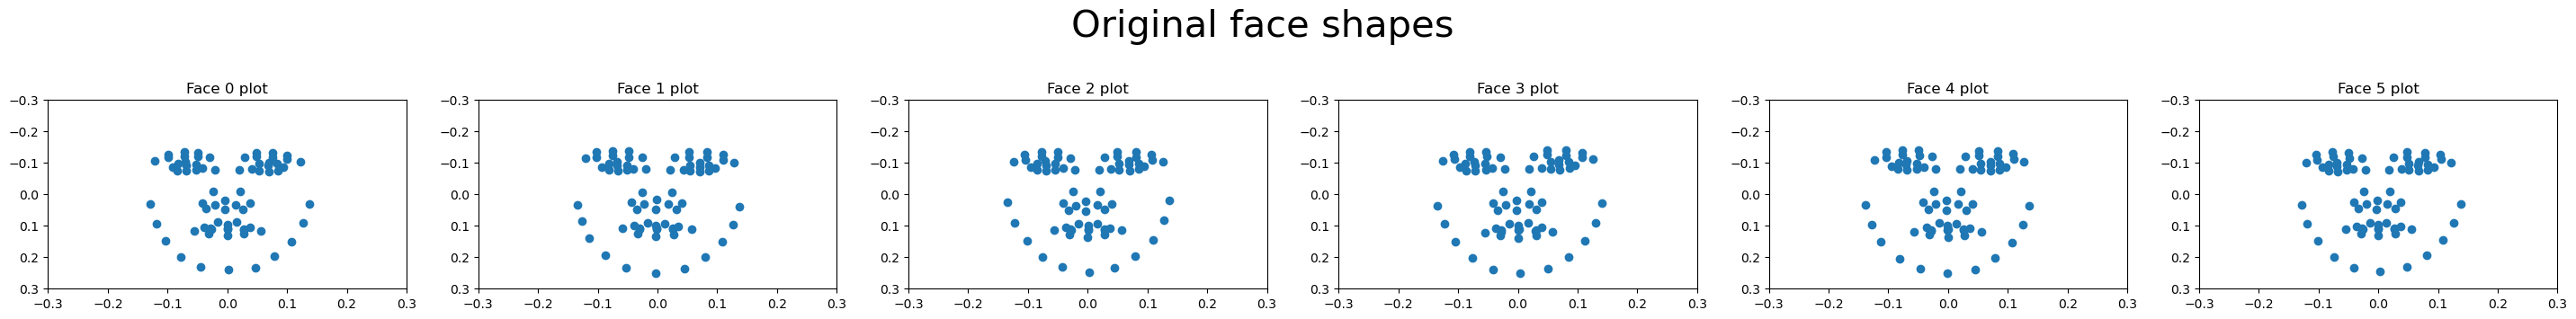

In [2]:
path = './db/'
shapes, _ = face_shape_data(path)

plot_many_faces(shapes[:6],"Original face shapes");

## PCA implementation
The following task(s) are about using PCA for dimensionality reduction. You should use the implementation from the in-class exercise. It is encouraged that you define a function that returns the all principal components `comp`
, eigenvalues `val`
 and mean vector `mu`
, given the dataset `shapes`
.

---
**Task 1 (easy): Get principal compontents👩‍💻**
1. Compute all principal components `comp`
 for the face dataset.
2. How many components are needed to have $50\%$, $60\%$, $80\%$, $95\%$ of the total variation?
3. Define the number of used components to be 5, how much of the total variance is retained?
4. Implement the functions `transform`
 and `inverse_transform`
 according to the comments in the function templates.
5. Verify that your implementation is working correctly by using the `plot_many_faces`
 function (imported from `utils.py`
) to plot $6$ face shapes before and after transforming to and back from latent space.


---

In [3]:
# Function templates
# 1 + 4
def get_principle_components(X):
    """Calculates principle components for X.

    Args:
        X: The dataset. An NxD array were N are the number of samples and D are
        the number of features.

    Returns:
        Tuple (components, eigenvalues, mu) where components is a DxD matrix of
        principle components, eigenvalues is a D-element vector of
        corresponding eigenvalues, and mu is a D-element array containing the mean
        vector.
    """
    mean = np.mean(X, axis=0)
    centered_data = X - mean
    covariance_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sort_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sort_idx]
    sorted_eigenvectors = eigenvectors[:, sort_idx]

    return (sorted_eigenvectors, sorted_eigenvalues, mean)

def transform(X, principle_components, mu):
    """Transforms X to an k-dimensional space where k is the number of
    principle_components.

    Args:
        X: The dataset. An NxD array were N are the number of samples and D are
        the number of features.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A D-element array containing the mean vector.

    Returns:
        A Nxk array describing the transformed data.
    """

    return np.dot((X - mu), principle_components)


def inverse_transform(v, principle_components, mu):
    """Reverses the dimensionality reduction of v, a Nxk matrix where
    k is the number of principle components. The result is a NxM matrix.

    Args:
        v: The transformed dataset with size Nxk.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A Mx1 matrix containing the mean vector.

    Returns:
        An NxD array reconstruction of the original feature vectors X.
    """
    return np.dot(v, principle_components.T) + mu

Cumulative variance larger than 0.5 of 0.6490960275876172% reached after 2 iterations
Cumulative variance larger than 0.6 of 0.6490960275876172% reached after 2 iterations
Cumulative variance larger than 0.8 of 0.8283508938665491% reached after 4 iterations
Cumulative variance larger than 0.95 of 0.9525677808087712% reached after 8 iterations


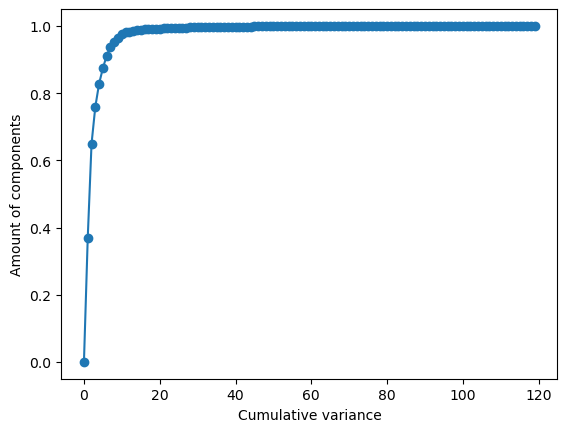

0.8742165232463094% of variance kept when using 5


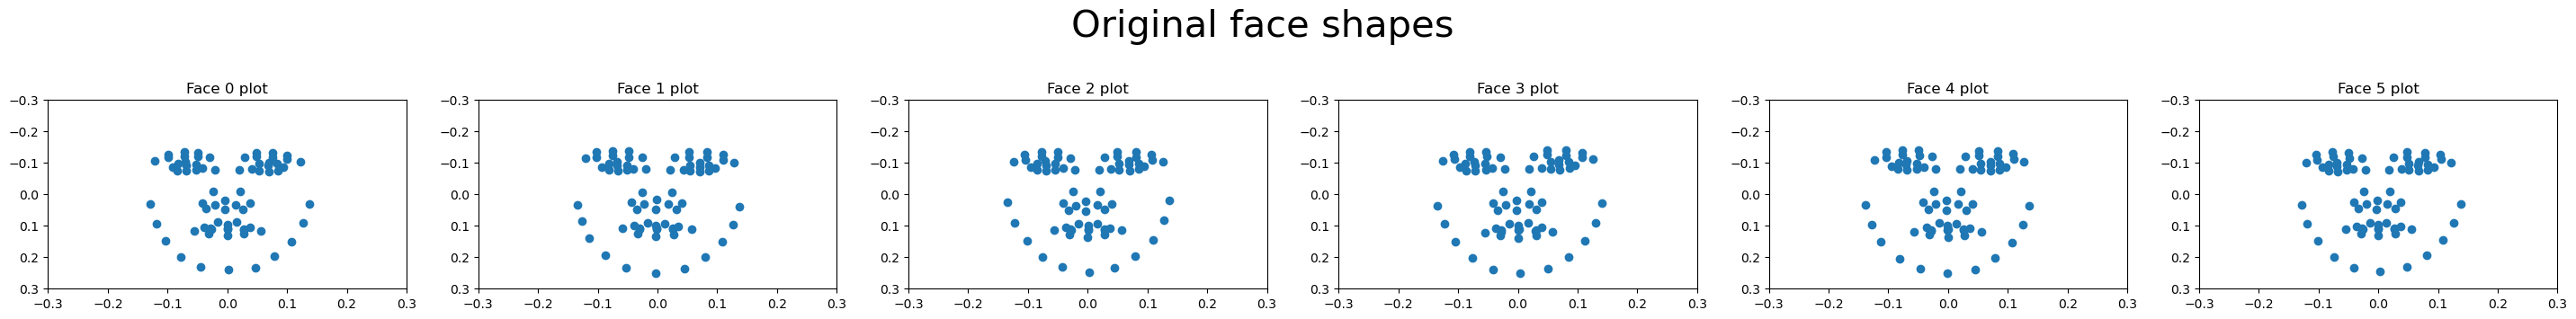

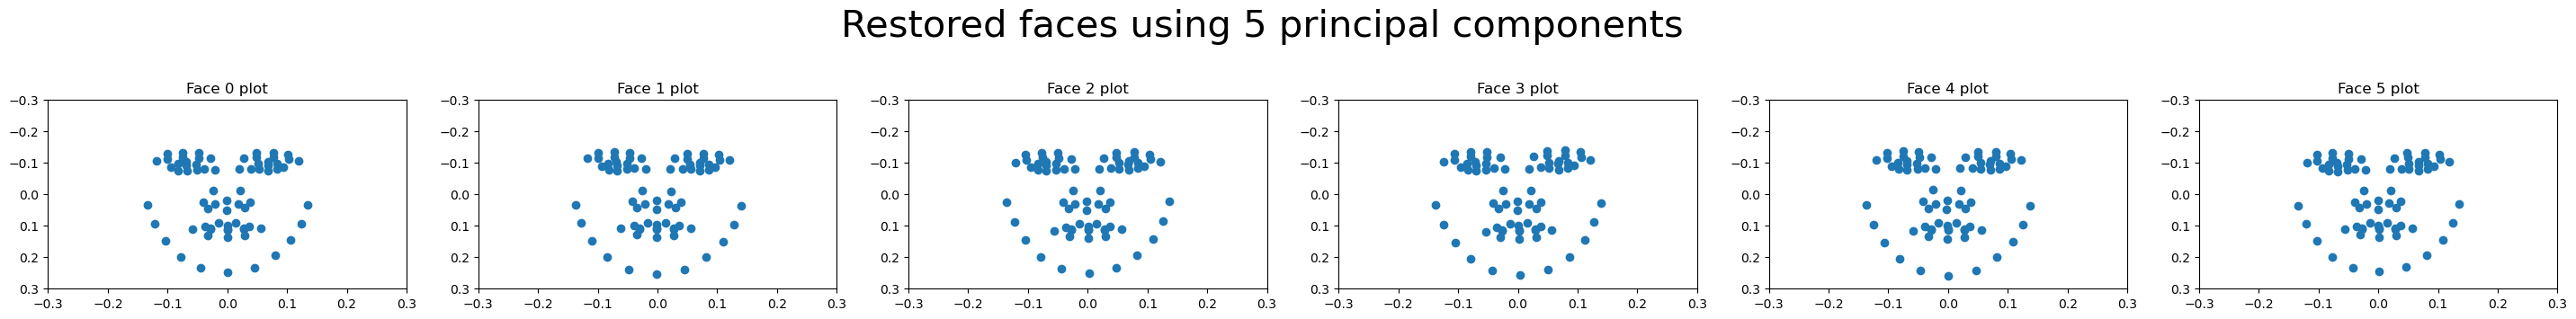

In [4]:
# Write you implementation code here..

# Get the principal components for the dataset and transform the faces to feature space.
# Uncomment below when you have copied your implementation

#########################################################################
comp, val, mu = get_principle_components(shapes)

# 2
######
# write code for finding the cumulative proportional variance here
def calculate_cumulative_variance(principle_components, k_components_count):
    return np.sum(principle_components[:k_components_count]) / np.sum(principle_components)
######

for percentage in [0.5, 0.6, 0.8, 0.95]:
    for k in range(len(shapes)):
        cumulative_variance = calculate_cumulative_variance(val, k)

        if cumulative_variance > percentage:
            print(f'Cumulative variance larger than {percentage} of {cumulative_variance}% reached after {k} iterations')
            break

plt.plot(
    [calculate_cumulative_variance(val, k) for k in range(len(shapes))],
    'o-',
    label='cumulative variance'
)
plt.xlabel("Cumulative variance")
plt.ylabel("Amount of components")
plt.show()

### selecting 5 components 
# 3
n_components = 5
print(f'{calculate_cumulative_variance(val, n_components)}% of variance kept when using {n_components}')

# 5
used = comp[:, :n_components]
### transforming and reconstructing the 6 first faces in the dataset
plot_many_faces(shapes[:6],"Original face shapes")
transformed = transform(shapes[:6], used, mu)
restored = inverse_transform(transformed, used, mu)
plot_many_faces(restored,"Restored faces using 5 principal components")

## Using PCA for shape generation
The principal components can be used to generate
new samples $\mathbf{x}$ in data space by transforming a point in latent space according to $\mathbf{x} = \Phi_{k} a + \mu$, where $\Phi_{k}$ is the matrix of k eigenvectors, $\mathbf{a}\in\mathbb{R}^{k}$ is an arbitrary vector in latent space, and $\mu\in\mathbb{R}^{D}$ is the mean vector of the data space features (in real space).

$$

{\Phi} = \begin{bmatrix} | & | & & | \\ \vec{v}_1 & \vec{v}_2 & \cdots & \vec{v}_k \\ | & | & & | \end{bmatrix}.

$$
The variance of the data in each principal component direction can be used to constrain the values of $\mathbf{a}$ in latent space, under the assumption that the faces are normally distributed. The variance in the direction of a principal component is given by its eigenvalue $\lambda$.
In a normal distribution $\pm 3\sigma$ contains $99.7\%$ of the data (see [Figure 1](#normal) ). Thus, an element of $\mathbf{a}$, $a_i$, is constrained to $a_i\in[-3\sigma_i, 3\sigma_i]$ to be within $99.7\%$ of the observed variance in the data,  where $\sigma_i = \sqrt{\lambda_i}$
<div class="has-text-centered">
<figure class="image is-inline-block" id="normal">

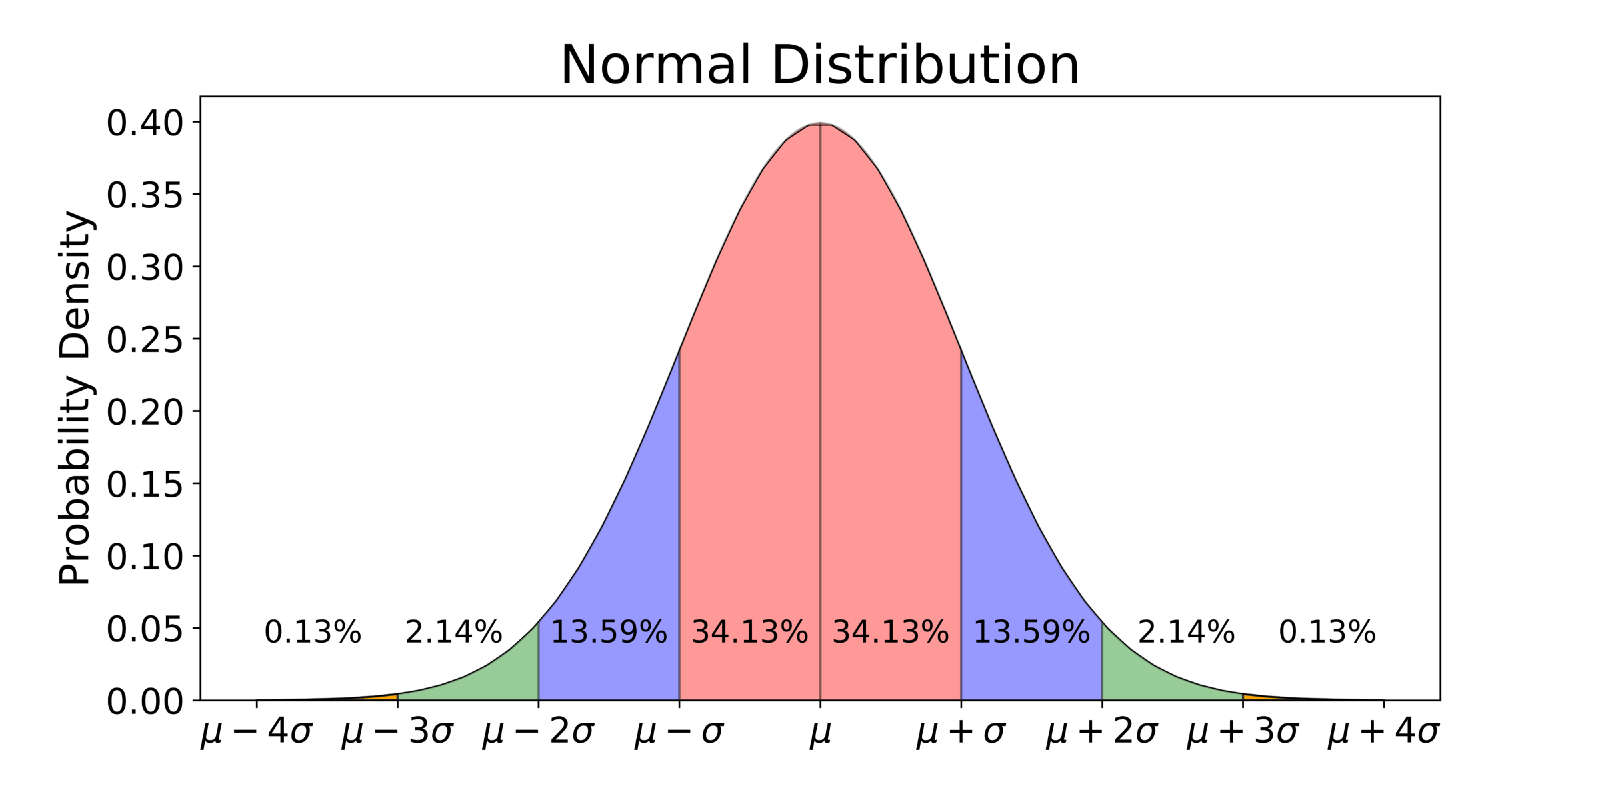

<figcaption class="figure-caption has-text-centered">Figure 1: Illustration of a normal distribution. The shaded regions indicate the
area of the distribution covered by 1, 2, 3, and 4, standard deviations
($\sigma$) respectively.
</figcaption>
</figure>
</div>

---
**Task 2 (medium): Base face👩‍💻💡**
1. **Generate vectors:** Create the zero vector in latent space, i.e. $\mathbf{a} = [0, 0, \dots, 0]\in\mathbb{R}^5$. 
2. **Shape generation:** Use $\mathbf{x} = \mathbf{\Phi} \mathbf{a} + \mathbf{\mu}$ to generate a face (vector in real space) from the $\mathbf{a}$. Use `plot_face`
 to visualise the generated face.
3. **Reflection** Describe what face is generated and why this is the case.


---

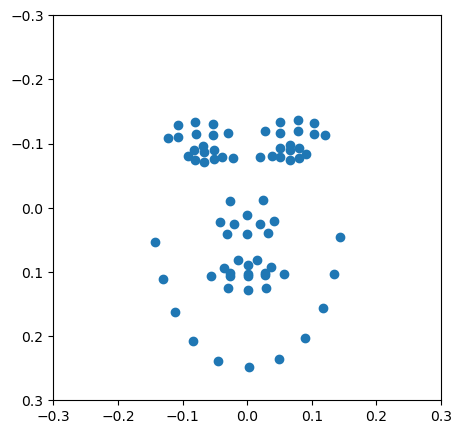

In [5]:
# Implementation for Base face code here... reflection in the field below!
a = np.zeros(5)
inverse_a = inverse_transform(a, comp[:, :5], mu)
plot_face(inverse_a)

**Task 2 Reflections**
Let's take a look at how the `inverse_transformation` is calculated: `return np.dot(v, principle_components.T) + mu`. Now `mu` represents the mean of all the values, which is the mean face. `v` is `a` which is the zero vector, hence the result of `np.dot(v, principle_components.T)` is 0, and thus we only return the mean face `+ mu`. This is why we see the mean face when plotting using the zero vector

---
**Task 3 (medium): Generate faces👩‍💻**
1. **Varying the 1st component:** Select 5 evenly spaced values (use `np.linspace`
) for $a_1$ in the range $[-3\sigma_1, 3\sigma_1]$, and the remaining element shoud be 0. Generate the 5 faces and plot them. 

2. **More components:** Do the same for each of the remaining four components, i.e. $a_2$-$a_5$.

3. **Component analysis:** Describe what each component changes in the faces (for example, the first component may change the length of the face). 



---

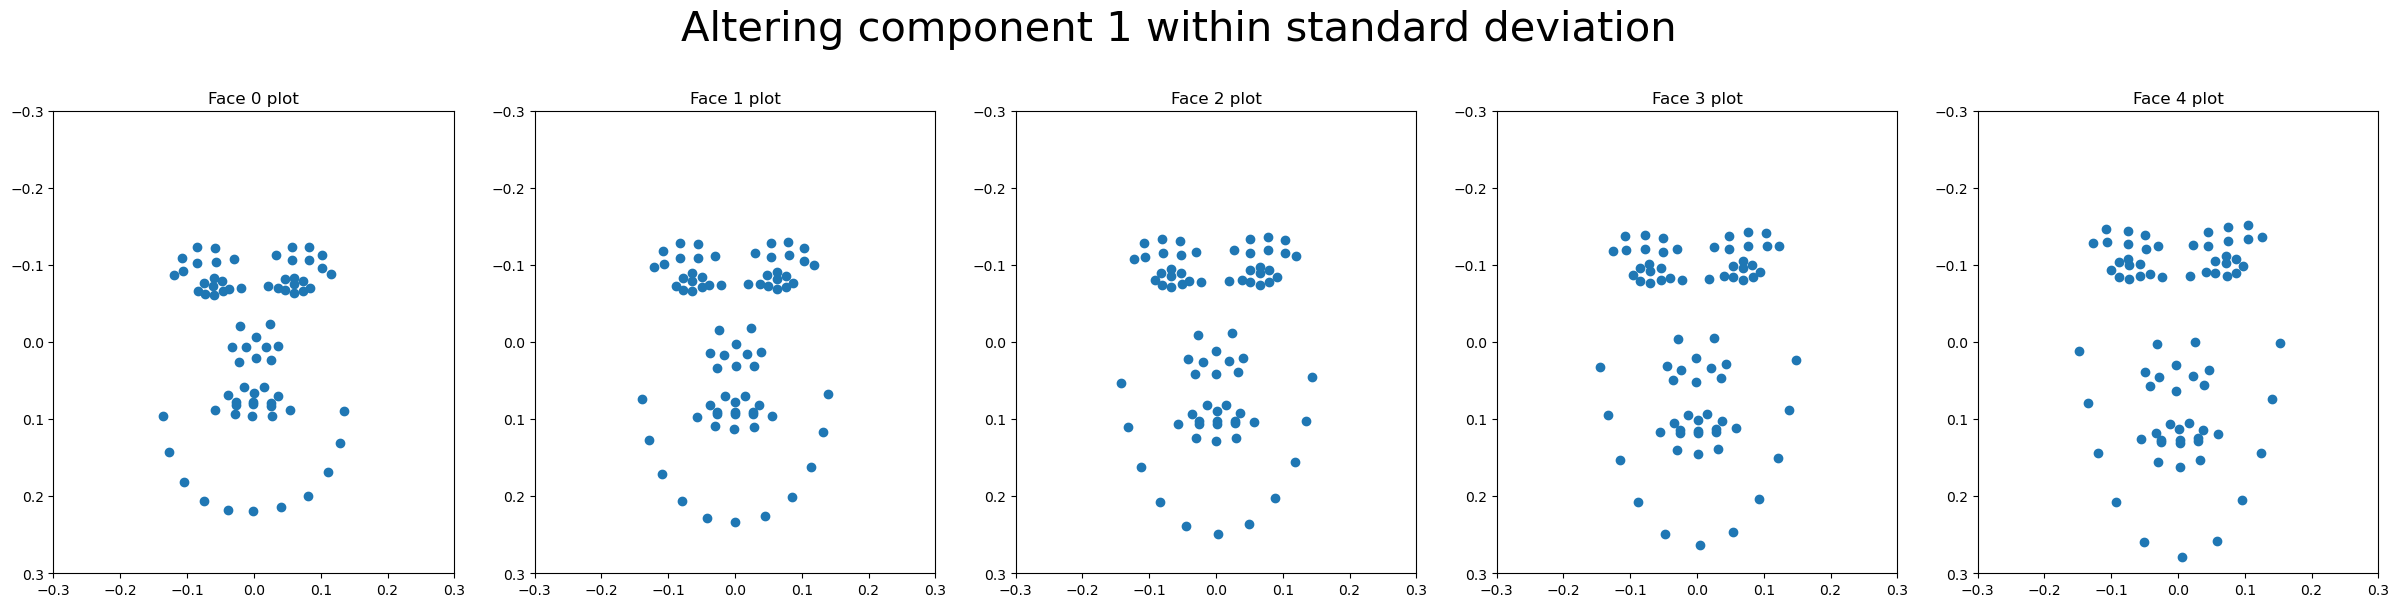

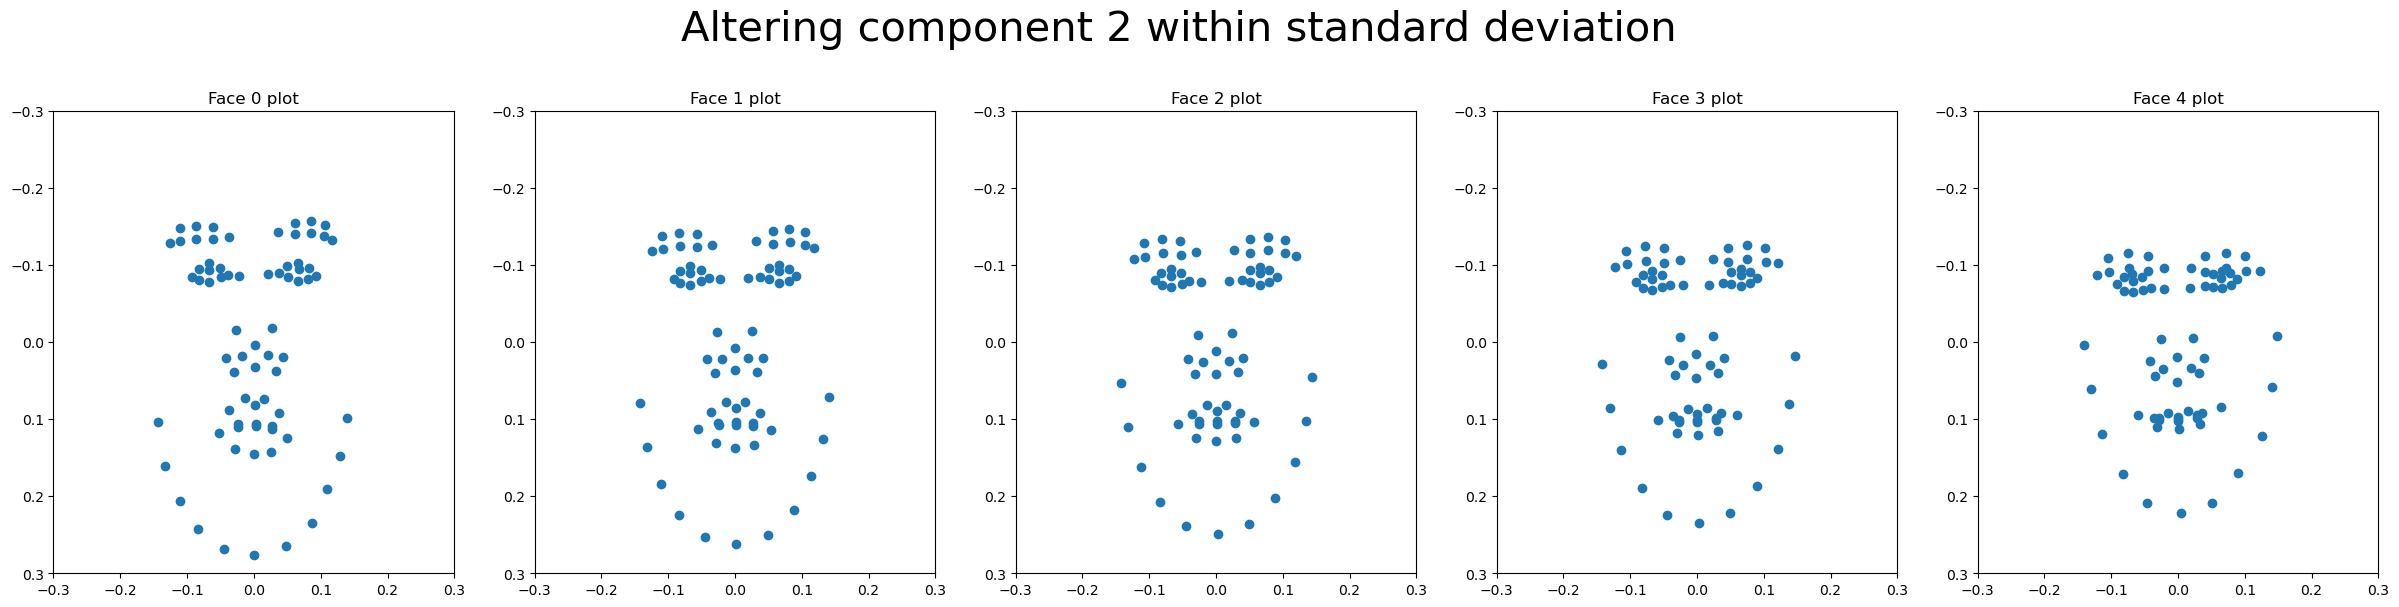

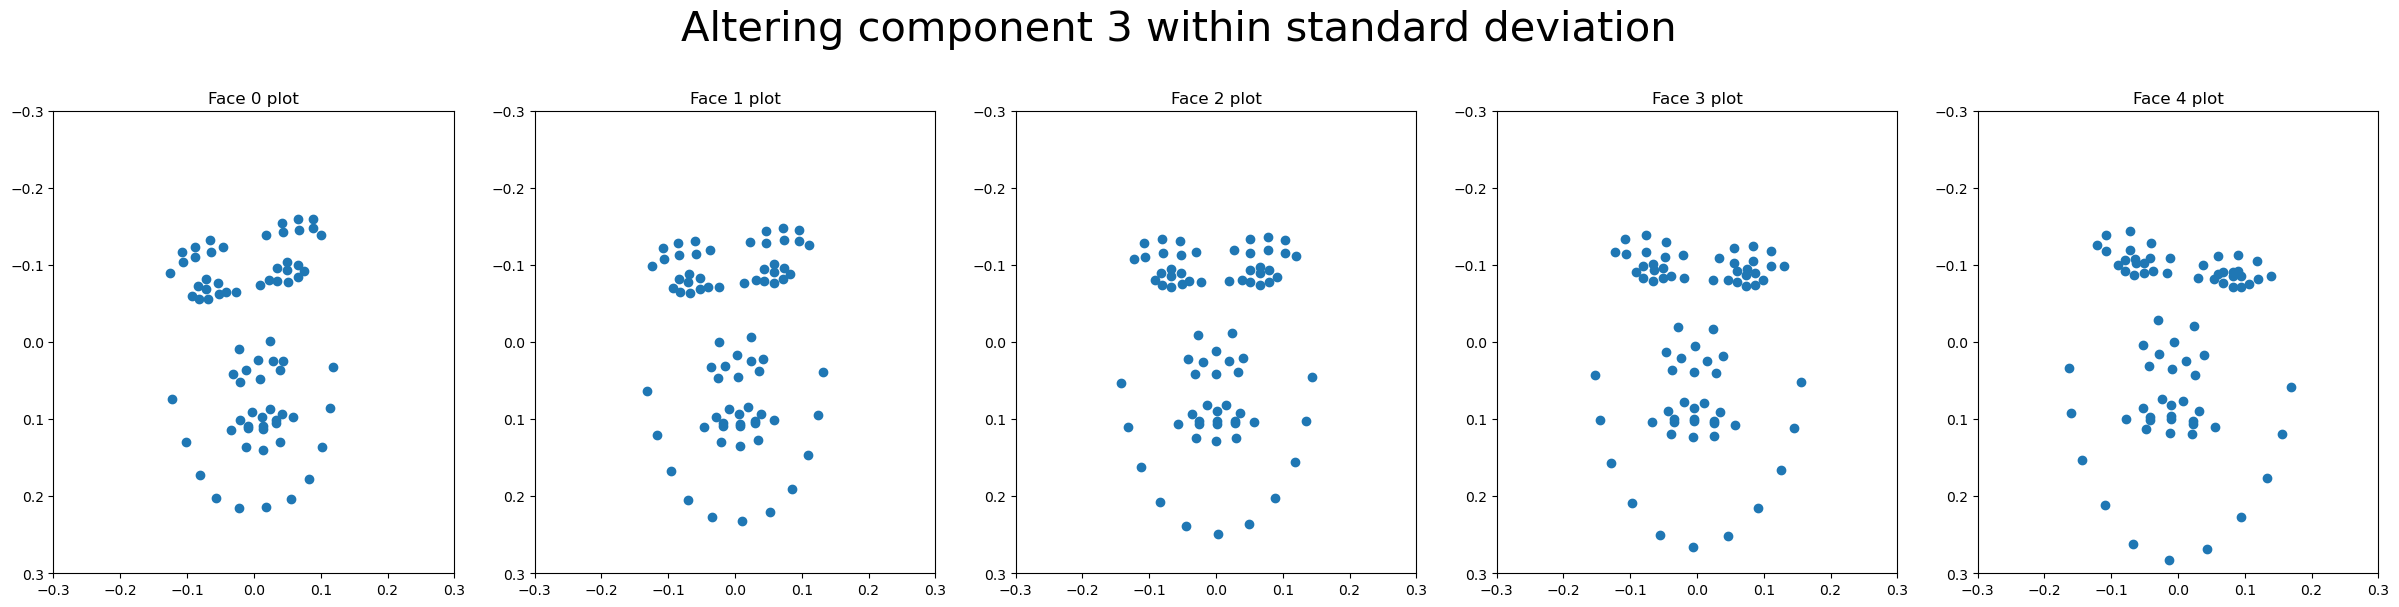

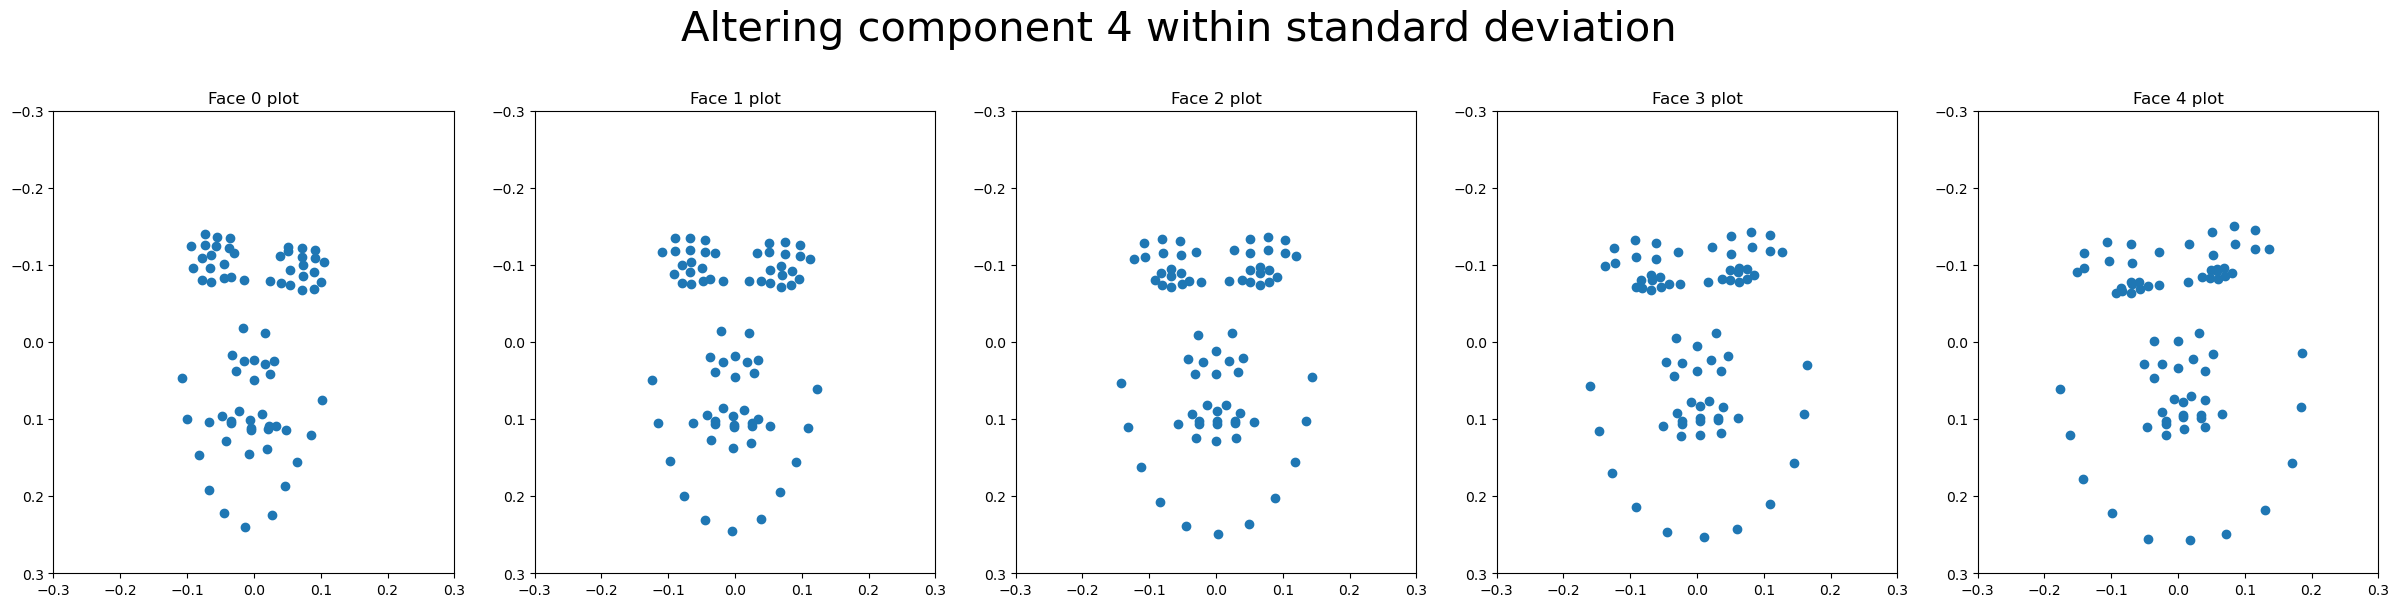

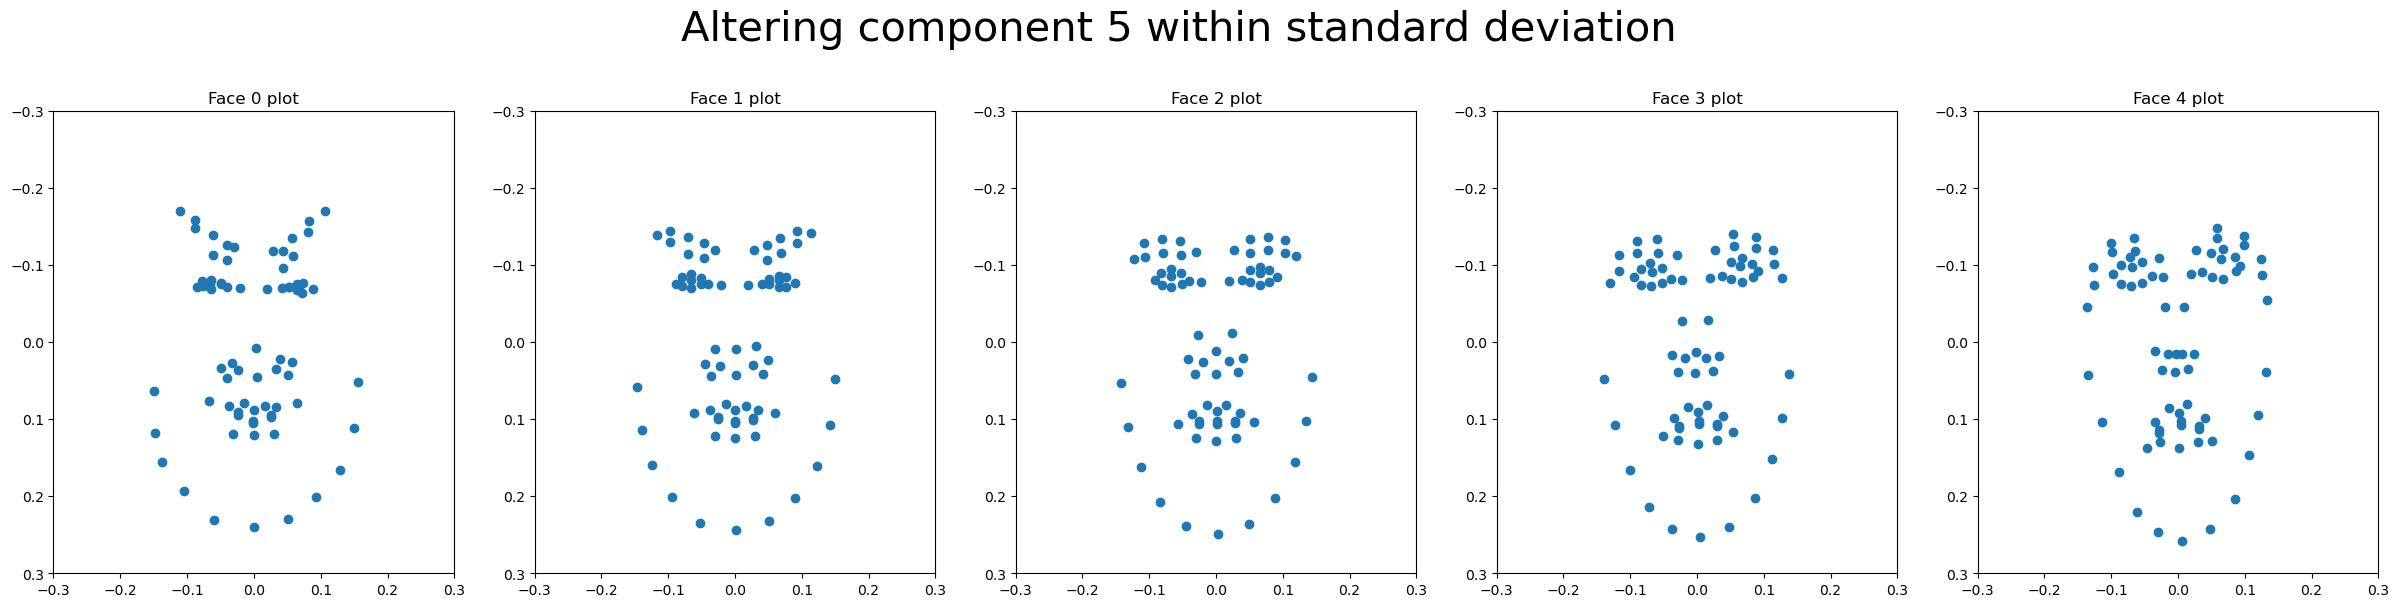

In [31]:
# Implementation for "Generate faces", the description should be written in the markdown field below
std_1 = np.sqrt(val[0]) # std/eigvalue for the first PC
np.linspace(-3*std_1, 3*std_1, num=5)
# Write your solution here
for i in range(5):
    # std = np.sqrt(val[i])
    faces = []

    for value in np.linspace(-3*std_1, 3*std_1, num=5):
        a = np.zeros(5)
        a[i] = value
        faces.append(inverse_transform(a, comp[:, :5], mu))

    plot_many_faces(faces, f'Altering component {i + 1} within standard deviation')

Let's take the faces line by line:
1. Length of the face - distance between chin and eyebrow
2. Reverse of 0 - reverse distance between chin and eyebrow
3. Side to side looking up - if the person is looking to the top left or to the top right 
4. Side to side looking down - if the person is looking to the bottom left or to the bottom right
5. Angry or not - distance between the inside of the eyebrow and the mouth

---
**Task 4 (medium): Interpolation between two faces👩‍💻**
**Shape Interpolation:**
1. Select two points ($\mathbf{a}$ and $\mathbf{b}$) in latent space and generate the faces.
2. Use `np.linspace`
 to create 6 evenly spaced points in latent space that interpolate between $\mathbf{a}$ and $\mathbf{b}$. Plot the resulting faces. 

Below is an example of how to interpolate two vectors.

---

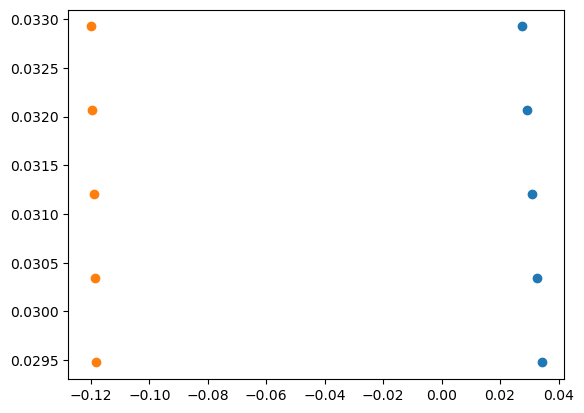

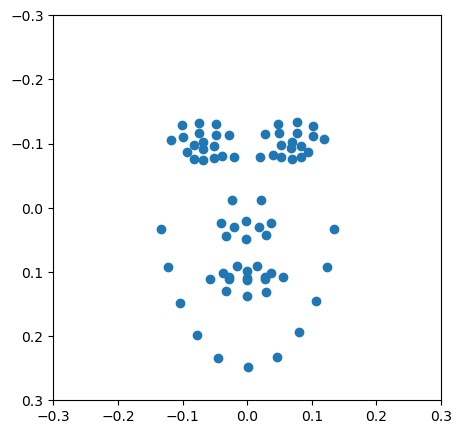

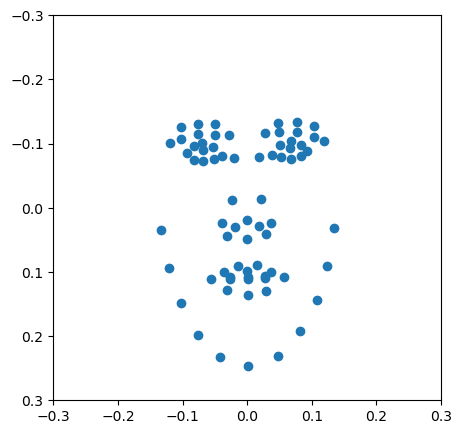

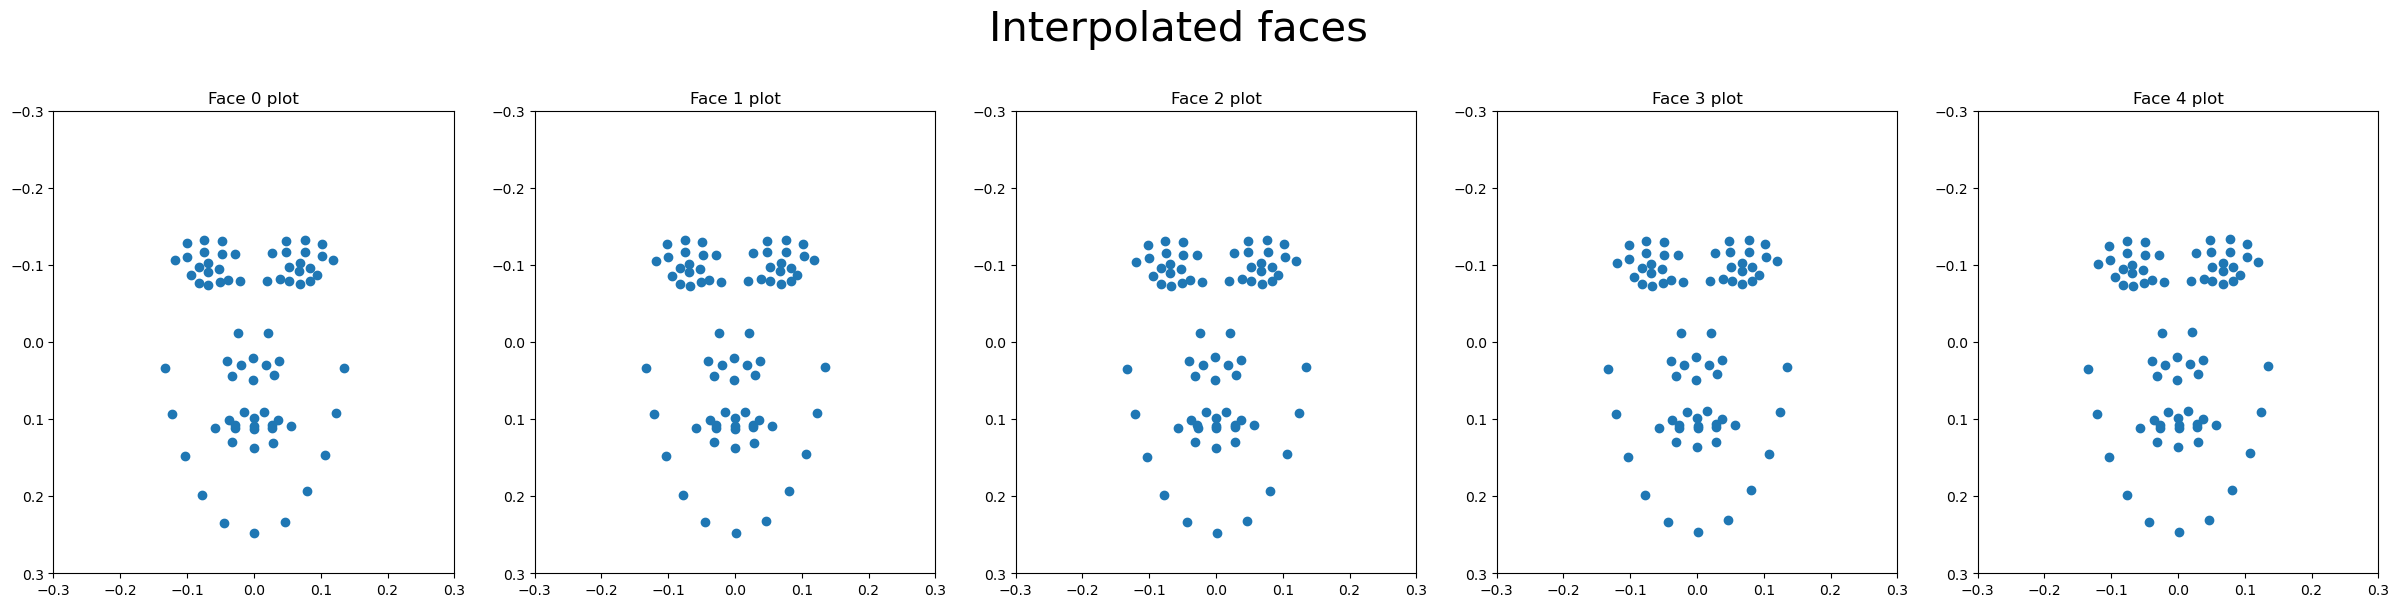

In [40]:
# #Template for doing interpolation between two (2D)- points 
# d = np.linspace(np.array([1, 2]), np.array([3, 5]), num=5)
# plt.scatter(d[:, 0], d[:, 1])
# ### write the implementation for "Interpolation between two faces" here

a = transformed[0]
a_inv = inverse_transform(a, comp[:, :5], mu)
b = transformed[5]
b_inv = inverse_transform(b, comp[:, :5], mu)

d = np.linspace(a, b, num=5)
d2 = np.linspace(a_inv, b_inv, num=5)
plt.scatter(d[:, 0], d[:, 1])
plt.scatter(d2[:, 0], d[:, 1])
plt.show()

plot_face(a_inv)
plot_face(b_inv)

faces = []
for value in d:
    zeros = np.zeros(5)
    zeros = value
    faces.append(inverse_transform(zeros, comp[:, :5], mu))

plot_many_faces(faces, f'Interpolated faces')


---
**Task 5 (medium): Reflection💡**
Describe and reflect on the results gathered from the exercises (including the non-mandatory ones). Answer the following questions:
1. **Behaviour:** Explain why, a set of points on a line in latent space, remain a line, when mapped to data space using $x = \Phi\mathbf{a} + \mu$. 
2. What did you think of the results from the generative model? Explain why so few principal components are needed to reproduce the samples quite accurately.


---Write reflections here.

1. Say we have two points and draw a line between them. Now we transform that line to a new space, and because this is done by linearly, they'll remian a line
2. Given that the 5 compnents used carries 87% of the data (variance), it makes sense that such few components are needed. Looking at the faces generated we see this as the components affect parts of the faces that makes then distinct. A face is more distinct if it's longer, compared to different sizes of noses

## Last section - optional
This last section consist of two tasks that provide valuable insight into the application of PCA but they are optional to do.

---
**Task 6 (medium): Dimensionality reduction of features _(optional)_👩‍💻💡**
1. **Transform data:** Use $\mathbf{\Phi^{\top}}$​ to transform the database faces $\mathbf{x}$ into latent-space $\mathbf{x'}$ (using $\mathbf{x'}= \mathbf{\Phi^{\top}}(\mathbf{x}-\mathbf{\mu})$).
2. Plot the two first components in latent space using a scatterplot.    - What does this plot tell you about the distribution of faces?
    - Experiment with showing different components. Describe how the different combinations splits the dataset.


3. **Interpolate between real faces:** Re-implement [Task 4](#interpolate) but instead of selecting 2 points in latent space, instead transform two real faces to latent space and interpolate between them.     - Plot the faces of the interpolated points.




---

In [ ]:
# Write implementation here

Describe the different scatter plots of component combinations

---
**Task 7 (medium): Out of distribution generation _(optional)_👩‍💻💡**
1. **Extreme values:** What happens if you select values outside the suggested range. Explain why this happens.


---

Write you reasoning for this occourence. 

**Submission**
[For submission details click here](https://learnit.itu.dk/mod/page/view.php?id=184893)

[For submitting the exercise click here](https://learnit.itu.dk/mod/assign/view.php?id=185256)


